# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Watch for changes in any of the imported files
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
from collections import deque
from unityagents import UnityEnvironment

import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name='Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each timestep.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next timestep
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.10000000149011612
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [7]:
# Note: `brain_name` should be defined globally
def env_step(env, actions):
    # Execute the action for each agent in the environment
    env_info = env.step(actions)[brain_name]
    # Get the next state for each agent
    next_states = env_info.vector_observations
    # Get the reward for each agent
    rewards = env_info.rewards
    # Get whether or not the episode has terminated
    dones = env_info.local_done
    return next_states, rewards, dones

In [8]:
def train_ddpg(agent, n_episodes=5000, save_file=None):
    """Deep Deterministic Policy Gradients.
    
    Params
    ======
        agent (Agent): an instance of a DDPG agent(s)
        n_episodes (int): maximum number of training episodes
        save_file (string): prefix for the actor and critic model filenames
    """
    
    # All the scores from each episode
    scores_all = []
    # The last 100 scores
    scores_window = deque(maxlen=100)
    
    # Loop over each episode
    for i_episode in range(1, n_episodes+1):
        # Reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # Get the current state for each agent
        states = env_info.vector_observations
        # Reset the noise
        agent.reset()
        # Initialize the score for each agent
        scores = np.zeros(num_agents)
        # Keep track of the current timestep
        t = 0
        
        # Loop over each timestep until done
        while True:            
            # Select an action for each agent according to the current policy
            actions = agent.act(states)
            # Execute the actions in the environment,
            #     then observe the next state and reward for each agent
            next_states, rewards, dones = env_step(env, actions)
            # Learn from experience and update network parameters for each agent
            agent.step(states, actions, rewards, next_states, dones)
            
            # Update the score for each agent
            scores += rewards
            # Roll over each state to the next timestep
            states = next_states
            # Record the current mean score across all agents, (overwriting the output)
            print(f'\rEpisode {i_episode}\tTimestep {t}'
                  f'\tCurrent Score: {np.mean(scores):.5f}', end="")
            t += 1
            # Exit the loop if the episode has terminated
            if np.any(dones):
                break
        
        # For this episode, add up the rewards that each agent received
        scores_sum = []
        for i_agent in range(num_agents):
            scores_sum.append(np.sum(scores[i_agent]))
        # For this episode, take the max over the two agent (summed) scores
        score = np.max(scores_sum)
        # Save the most recent score
        scores_all.append(score)
        scores_window.append(score)
        # Record the mean score over the last 100 scores
        mean_score = np.mean(scores_window)
                
        # Every 20 episodes, record the mean score over the last 100 (or less) episodes
        if i_episode % 20 == 0:
            print(f'\rEpisode {i_episode}'
                  f'\tAverage score over the last 100 episodes: {mean_score:.5f}')
            
        # Goal: Reach 0.5+ over 100 consecutive episodes
        if mean_score >= 0.5:
            print(f'\nEnvironment solved in {i_episode:d} episodes!'
                  f'\tAverage score over the last 100 episodes: {mean_score:.5f}')
            if save_file:
                torch.save(agent.actor_local.state_dict(), f'{save_file}_actor.pth')
                torch.save(agent.critic_local.state_dict(), f'{save_file}_critic.pth')
            break
            
    return scores_all

#### Initial Run

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01950
Episode 40	Average score over the last 100 episodes: 0.01225
Episode 60	Average score over the last 100 episodes: 0.00983
Episode 80	Average score over the last 100 episodes: 0.01350
Episode 100	Average score over the last 100 episodes: 0.01080
Episode 120	Average score over the last 100 episodes: 0.00990
Episode 140	Average score over the last 100 episodes: 0.02360
Episode 160	Average score over the last 100 episodes: 0.04040
Episode 180	Average score over the last 100 episodes: 0.05640
Episode 200	Average score over the last 100 episodes: 0.07890
Episode 220	Average score over the last 100 episodes: 0.10270
Episode 240	Average score over the last 100 episodes: 0.11090
Episode 260	Average score over the last 100 episodes: 0.12110
Episode 280	Average score over the last 100 episodes: 0.13290
Episode 300	Average score over the last 100 episodes: 0.14830
Episode 320	Average score over the last 100 episodes: 0.14230
Episode 340	

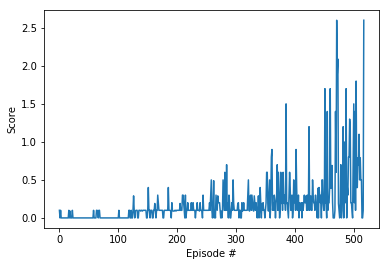

In [9]:
# Instantiate the agent
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)

# Train the DDPG agent
scores = train_ddpg(agent, save_file='./checkpoints/initial')

# Plot the scores
plot_scores(scores)

#### Trial Runs

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.00500
Episode 40	Average score over the last 100 episodes: 0.01225
Episode 60	Average score over the last 100 episodes: 0.01633
Episode 80	Average score over the last 100 episodes: 0.02538
Episode 100	Average score over the last 100 episodes: 0.02880
Episode 120	Average score over the last 100 episodes: 0.04040
Episode 140	Average score over the last 100 episodes: 0.04720
Episode 160	Average score over the last 100 episodes: 0.05980
Episode 180	Average score over the last 100 episodes: 0.06670
Episode 200	Average score over the last 100 episodes: 0.07550
Episode 220	Average score over the last 100 episodes: 0.07290
Episode 240	Average score over the last 100 episodes: 0.06990
Episode 260	Average score over the last 100 episodes: 0.07020
Episode 280	Average score over the last 100 episodes: 0.06940
Episode 300	Average score over the last 100 episodes: 0.07790
Episode 320	Average score over the last 100 episodes: 0.08490
Episode 340	

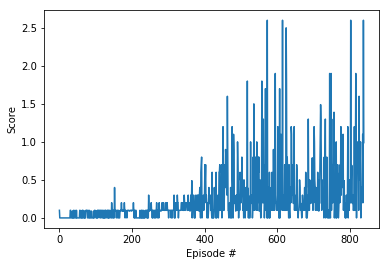

In [10]:
# Try with tau of 1e-3
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_01')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.00500
Episode 60	Average score over the last 100 episodes: 0.01000
Episode 80	Average score over the last 100 episodes: 0.01000
Episode 100	Average score over the last 100 episodes: 0.01590
Episode 120	Average score over the last 100 episodes: 0.01990
Episode 140	Average score over the last 100 episodes: 0.02670
Episode 160	Average score over the last 100 episodes: 0.03260
Episode 180	Average score over the last 100 episodes: 0.04350
Episode 200	Average score over the last 100 episodes: 0.07040
Episode 220	Average score over the last 100 episodes: 0.09510
Episode 240	Average score over the last 100 episodes: 0.11410
Episode 260	Average score over the last 100 episodes: 0.12790
Episode 280	Average score over the last 100 episodes: 0.14990
Episode 300	Average score over the last 100 episodes: 0.14400
Episode 320	Average score over the last 100 episodes: 0.14230
Episode 340	

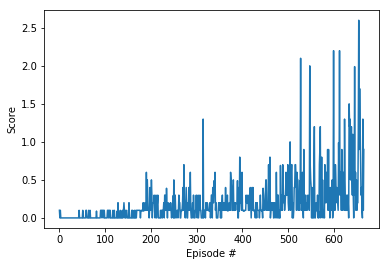

In [11]:
# Try with tau of 1e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_02')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.01475
Episode 60	Average score over the last 100 episodes: 0.01317
Episode 80	Average score over the last 100 episodes: 0.01850
Episode 100	Average score over the last 100 episodes: 0.02460
Episode 120	Average score over the last 100 episodes: 0.03330
Episode 140	Average score over the last 100 episodes: 0.04220
Episode 160	Average score over the last 100 episodes: 0.05410
Episode 180	Average score over the last 100 episodes: 0.06800
Episode 200	Average score over the last 100 episodes: 0.08320
Episode 220	Average score over the last 100 episodes: 0.13230
Episode 240	Average score over the last 100 episodes: 0.16830
Episode 260	Average score over the last 100 episodes: 0.20120
Episode 280	Average score over the last 100 episodes: 0.21530
Episode 300	Average score over the last 100 episodes: 0.25980
Episode 320	Average score over the last 100 episodes: 0.27190
Episode 340	

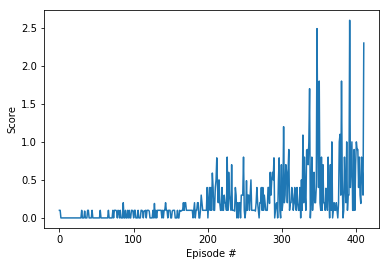

In [12]:
# Try with tau of 5e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_03')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.00950
Episode 40	Average score over the last 100 episodes: 0.00475
Episode 60	Average score over the last 100 episodes: 0.00950
Episode 80	Average score over the last 100 episodes: 0.00963
Episode 100	Average score over the last 100 episodes: 0.00970
Episode 120	Average score over the last 100 episodes: 0.01870
Episode 140	Average score over the last 100 episodes: 0.02560
Episode 160	Average score over the last 100 episodes: 0.03150
Episode 180	Average score over the last 100 episodes: 0.04020
Episode 200	Average score over the last 100 episodes: 0.04810
Episode 220	Average score over the last 100 episodes: 0.06200
Episode 240	Average score over the last 100 episodes: 0.09210
Episode 260	Average score over the last 100 episodes: 0.11630
Episode 280	Average score over the last 100 episodes: 0.16230
Episode 300	Average score over the last 100 episodes: 0.19810
Episode 320	Average score over the last 100 episodes: 0.21220
Episode 340	

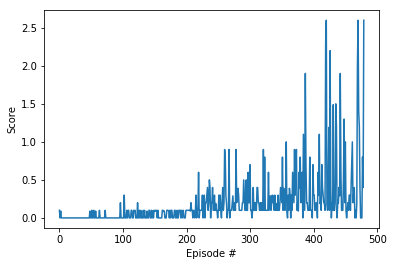

In [13]:
# Try with tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_04')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.01450
Episode 60	Average score over the last 100 episodes: 0.01750
Episode 80	Average score over the last 100 episodes: 0.01313
Episode 100	Average score over the last 100 episodes: 0.01050
Episode 120	Average score over the last 100 episodes: 0.00850
Episode 140	Average score over the last 100 episodes: 0.01360
Episode 160	Average score over the last 100 episodes: 0.01190
Episode 180	Average score over the last 100 episodes: 0.01980
Episode 200	Average score over the last 100 episodes: 0.02170
Episode 220	Average score over the last 100 episodes: 0.03770
Episode 240	Average score over the last 100 episodes: 0.03660
Episode 260	Average score over the last 100 episodes: 0.04060
Episode 280	Average score over the last 100 episodes: 0.03360
Episode 300	Average score over the last 100 episodes: 0.03360
Episode 320	Average score over the last 100 episodes: 0.04550
Episode 340	

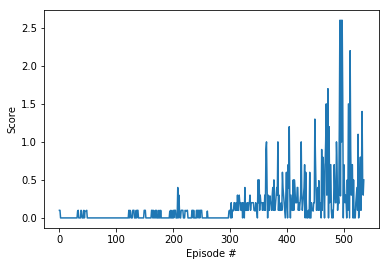

In [14]:
# Try with tau of 4e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_05')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.00500
Episode 40	Average score over the last 100 episodes: 0.00250
Episode 60	Average score over the last 100 episodes: 0.00167
Episode 80	Average score over the last 100 episodes: 0.00363
Episode 100	Average score over the last 100 episodes: 0.00290
Episode 120	Average score over the last 100 episodes: 0.00390
Episode 140	Average score over the last 100 episodes: 0.00580
Episode 160	Average score over the last 100 episodes: 0.01380
Episode 180	Average score over the last 100 episodes: 0.01190
Episode 200	Average score over the last 100 episodes: 0.01190
Episode 220	Average score over the last 100 episodes: 0.00990
Episode 240	Average score over the last 100 episodes: 0.00800
Episode 260	Average score over the last 100 episodes: 0.00000
Episode 280	Average score over the last 100 episodes: 0.00390
Episode 300	Average score over the last 100 episodes: 0.01150
Episode 320	Average score over the last 100 episodes: 0.02250
Episode 340	

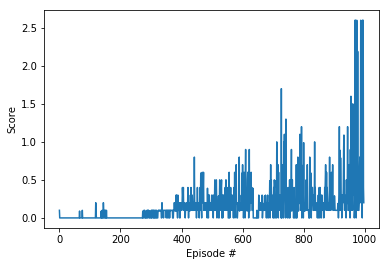

In [15]:
# Try with tau of 2e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_06')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.00500
Episode 60	Average score over the last 100 episodes: 0.00483
Episode 80	Average score over the last 100 episodes: 0.01463
Episode 100	Average score over the last 100 episodes: 0.01360
Episode 120	Average score over the last 100 episodes: 0.01360
Episode 140	Average score over the last 100 episodes: 0.01360
Episode 160	Average score over the last 100 episodes: 0.02570
Episode 180	Average score over the last 100 episodes: 0.02870
Episode 200	Average score over the last 100 episodes: 0.03660
Episode 220	Average score over the last 100 episodes: 0.04450
Episode 240	Average score over the last 100 episodes: 0.05400
Episode 260	Average score over the last 100 episodes: 0.06130
Episode 280	Average score over the last 100 episodes: 0.06430
Episode 300	Average score over the last 100 episodes: 0.06700
Episode 320	Average score over the last 100 episodes: 0.07360
Episode 340	

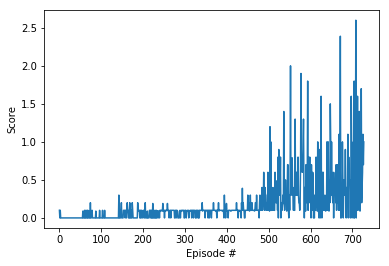

In [16]:
# Try with batch size of 256
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_07')
plot_scores(scores)

## Best Result

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.00750
Episode 60	Average score over the last 100 episodes: 0.01500
Episode 80	Average score over the last 100 episodes: 0.01988
Episode 100	Average score over the last 100 episodes: 0.02480
Episode 120	Average score over the last 100 episodes: 0.04250
Episode 140	Average score over the last 100 episodes: 0.08230
Episode 160	Average score over the last 100 episodes: 0.10920
Episode 180	Average score over the last 100 episodes: 0.15100
Episode 200	Average score over the last 100 episodes: 0.19710
Episode 220	Average score over the last 100 episodes: 0.23110
Episode 240	Average score over the last 100 episodes: 0.29780
Episode 260	Average score over the last 100 episodes: 0.37250
Episode 280	Average score over the last 100 episodes: 0.44650
Episode 300	Average score over the last 100 episodes: 0.46020
Episode 320	Average score over the last 100 episodes: 0.48830
Episode 335	

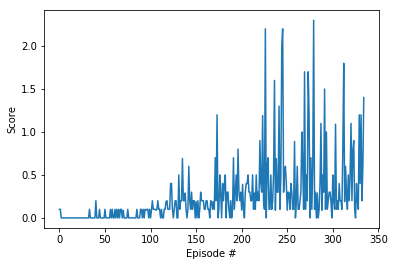

In [17]:
# Try with batch size of 512
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_08')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.00500
Episode 40	Average score over the last 100 episodes: 0.00500
Episode 60	Average score over the last 100 episodes: 0.00500
Episode 80	Average score over the last 100 episodes: 0.01000
Episode 100	Average score over the last 100 episodes: 0.01190
Episode 120	Average score over the last 100 episodes: 0.01770
Episode 140	Average score over the last 100 episodes: 0.02460
Episode 160	Average score over the last 100 episodes: 0.05340
Episode 180	Average score over the last 100 episodes: 0.08440
Episode 200	Average score over the last 100 episodes: 0.12740
Episode 220	Average score over the last 100 episodes: 0.17690
Episode 240	Average score over the last 100 episodes: 0.22790
Episode 260	Average score over the last 100 episodes: 0.25600
Episode 280	Average score over the last 100 episodes: 0.25990
Episode 300	Average score over the last 100 episodes: 0.24390
Episode 320	Average score over the last 100 episodes: 0.26650
Episode 340	

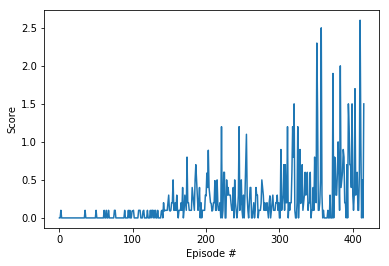

In [18]:
# Try with batch size of 1024
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_09')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.00500
Episode 60	Average score over the last 100 episodes: 0.00333
Episode 80	Average score over the last 100 episodes: 0.00625
Episode 100	Average score over the last 100 episodes: 0.01490
Episode 120	Average score over the last 100 episodes: 0.02590
Episode 140	Average score over the last 100 episodes: 0.03280
Episode 160	Average score over the last 100 episodes: 0.04460
Episode 180	Average score over the last 100 episodes: 0.05660
Episode 200	Average score over the last 100 episodes: 0.06370
Episode 220	Average score over the last 100 episodes: 0.07060
Episode 240	Average score over the last 100 episodes: 0.08260
Episode 260	Average score over the last 100 episodes: 0.08570
Episode 280	Average score over the last 100 episodes: 0.09150
Episode 300	Average score over the last 100 episodes: 0.11310
Episode 320	Average score over the last 100 episodes: 0.13300
Episode 340	

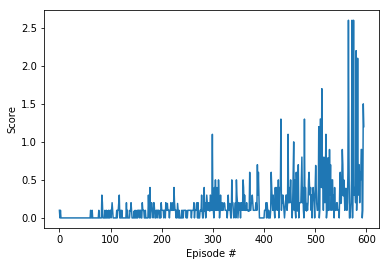

In [19]:
# Try with batch size of 64
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_10')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.01750
Episode 60	Average score over the last 100 episodes: 0.02383
Episode 80	Average score over the last 100 episodes: 0.02038
Episode 100	Average score over the last 100 episodes: 0.01920
Episode 120	Average score over the last 100 episodes: 0.02320
Episode 140	Average score over the last 100 episodes: 0.02620
Episode 160	Average score over the last 100 episodes: 0.02940
Episode 180	Average score over the last 100 episodes: 0.04090
Episode 200	Average score over the last 100 episodes: 0.05130
Episode 220	Average score over the last 100 episodes: 0.06160
Episode 240	Average score over the last 100 episodes: 0.06620
Episode 260	Average score over the last 100 episodes: 0.06640
Episode 280	Average score over the last 100 episodes: 0.06910
Episode 300	Average score over the last 100 episodes: 0.06970
Episode 320	Average score over the last 100 episodes: 0.07730
Episode 340	

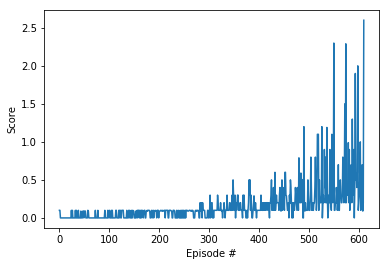

In [20]:
# Try with actor learning rate of 1e-3
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_11')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.00500
Episode 40	Average score over the last 100 episodes: 0.00250
Episode 60	Average score over the last 100 episodes: 0.01167
Episode 80	Average score over the last 100 episodes: 0.00875
Episode 100	Average score over the last 100 episodes: 0.00990
Episode 120	Average score over the last 100 episodes: 0.01170
Episode 140	Average score over the last 100 episodes: 0.01370
Episode 160	Average score over the last 100 episodes: 0.01460
Episode 180	Average score over the last 100 episodes: 0.02060
Episode 200	Average score over the last 100 episodes: 0.02470
Episode 220	Average score over the last 100 episodes: 0.03180
Episode 240	Average score over the last 100 episodes: 0.04950
Episode 260	Average score over the last 100 episodes: 0.05860
Episode 280	Average score over the last 100 episodes: 0.07260
Episode 300	Average score over the last 100 episodes: 0.08550
Episode 320	Average score over the last 100 episodes: 0.09160
Episode 340	

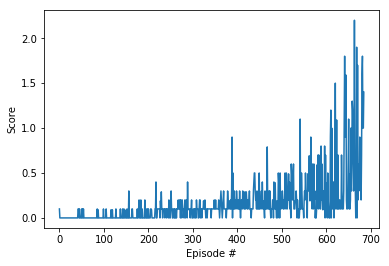

In [21]:
# Try with actor learning rate of 1e-2 and critic learning rate of 1e-2
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_12')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01950
Episode 40	Average score over the last 100 episodes: 0.02125
Episode 60	Average score over the last 100 episodes: 0.01750
Episode 80	Average score over the last 100 episodes: 0.01313
Episode 100	Average score over the last 100 episodes: 0.01150
Episode 120	Average score over the last 100 episodes: 0.00850
Episode 140	Average score over the last 100 episodes: 0.00390
Episode 160	Average score over the last 100 episodes: 0.01080
Episode 180	Average score over the last 100 episodes: 0.01570
Episode 200	Average score over the last 100 episodes: 0.02150
Episode 220	Average score over the last 100 episodes: 0.02930
Episode 240	Average score over the last 100 episodes: 0.05390
Episode 260	Average score over the last 100 episodes: 0.06090
Episode 280	Average score over the last 100 episodes: 0.05700
Episode 300	Average score over the last 100 episodes: 0.08920
Episode 320	Average score over the last 100 episodes: 0.11430
Episode 340	

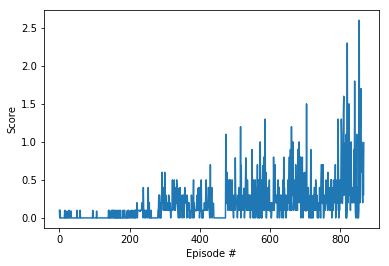

In [22]:
# Try with critic learning rate of 1e-4
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_13')
plot_scores(scores)

/Users/naga/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.00750
Episode 60	Average score over the last 100 episodes: 0.01167
Episode 80	Average score over the last 100 episodes: 0.01875
Episode 100	Average score over the last 100 episodes: 0.02380
Episode 120	Average score over the last 100 episodes: 0.02980
Episode 140	Average score over the last 100 episodes: 0.03860
Episode 160	Average score over the last 100 episodes: 0.04920
Episode 180	Average score over the last 100 episodes: 0.06020
Episode 200	Average score over the last 100 episodes: 0.07830
Episode 220	Average score over the last 100 episodes: 0.09610
Episode 240	Average score over the last 100 episodes: 0.10410
Episode 260	Average score over the last 100 episodes: 0.12240
Episode 280	Average score over the last 100 episodes: 0.11830
Episode 300	Average score over the last 100 episodes: 0.11430
Episode 320	Average score over the last 100 episodes: 0.14640
Episode 340	

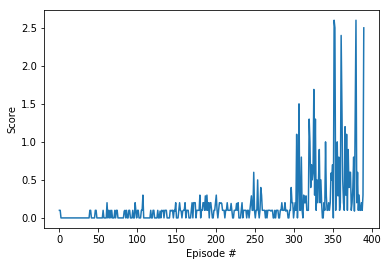

In [23]:
# Try with actor learning rate of 5e-5 and critic learning rate of 5e-5
# Set to tau of 3e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_14')
plot_scores(scores)